# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols , diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - Cost Funtion 

$f(x) = x^2 + x + 1$

In [2]:
def f(x) :
    return x**2 + x + 1

In [3]:
#make the data
x_1 = np.linspace(start = -3, stop = 3, num = 500) #array

In [4]:
print(x_1)

[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357 -2.87975952 -2.86773547
 -2.85571142 -2.84368737 -2.83166333 -2.81963928 -2.80761523 -2.79559118
 -2.78356713 -2.77154309 -2.75951904 -2.74749499 -2.73547094 -2.72344689
 -2.71142285 -2.6993988  -2.68737475 -2.6753507  -2.66332665 -2.65130261
 -2.63927856 -2.62725451 -2.61523046 -2.60320641 -2.59118236 -2.57915832
 -2.56713427 -2.55511022 -2.54308617 -2.53106212 -2.51903808 -2.50701403
 -2.49498998 -2.48296593 -2.47094188 -2.45891784 -2.44689379 -2.43486974
 -2.42284569 -2.41082164 -2.3987976  -2.38677355 -2.3747495  -2.36272545
 -2.3507014  -2.33867735 -2.32665331 -2.31462926 -2.30260521 -2.29058116
 -2.27855711 -2.26653307 -2.25450902 -2.24248497 -2.23046092 -2.21843687
 -2.20641283 -2.19438878 -2.18236473 -2.17034068 -2.15831663 -2.14629259
 -2.13426854 -2.12224449 -2.11022044 -2.09819639 -2.08617234 -2.0741483
 -2.06212425 -2.0501002  -2.03807615 -2.0260521  -2.

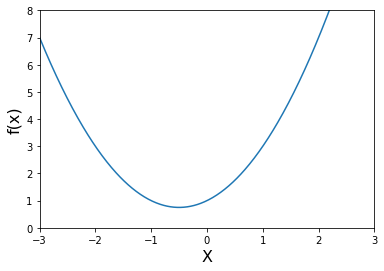

In [5]:
#plot
plt.xlim([-3,3])
plt.xlabel("X" , fontsize = 16)
plt.ylim([0,8])
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derrivatve
derrivative of $df(x)$

In [6]:
def df(x) :
    return 2*x + 1

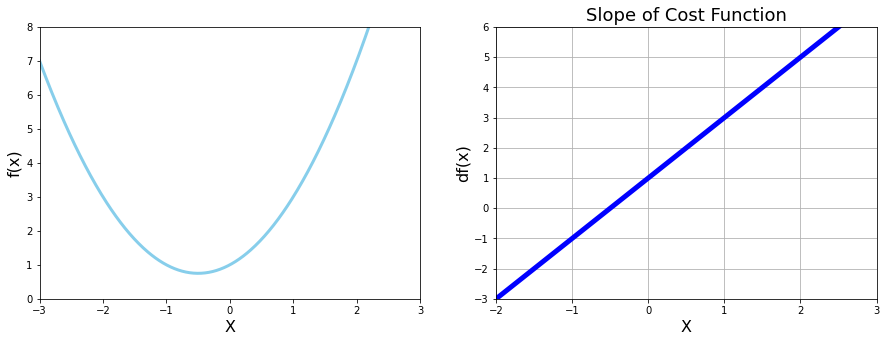

In [7]:
#plot function of derivative side by side

plt.figure(figsize=[15,5])

## cost function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.xlabel("X" , fontsize = 16)
plt.ylim([0,8])
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, f(x_1), color = "skyblue" , linewidth =3)

# cost function

plt.subplot(1,2,2)
plt.plot(x_1, df(x_1), color = "blue" , linewidth = 5)
plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.ylim([-3,6])
plt.xlim([-2,3])
plt.show()

## Python Loops for Gradient Decent

In [8]:
## basic for
for counter in range(5) :
    print("hello world", counter)
print("End of Loop!!")

hello world 0
hello world 1
hello world 2
hello world 3
hello world 4
End of Loop!!


In [9]:
counter = 0
while counter <= 10 :
    print(f"counting...{counter}" )
    counter += 1 
print("Ready or not, IM COMING FOR YOU!!!")

counting...0
counting...1
counting...2
counting...3
counting...4
counting...5
counting...6
counting...7
counting...8
counting...9
counting...10
Ready or not, IM COMING FOR YOU!!!


In [10]:
## Gradient Decent
new_x = 3
previous_x = 0
step_multiplier = 0.1 ##gamma/lerniuing rate
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500) :
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    # print step size
    if step_size < precision :
        print(f"Loop ran {n} times")
        break
    
print(f"Local minimum occurs at : {new_x}")
print(f"Slope or df(x) value at this point is : {df(new_x)}")
print(f"f(x) value or cost at this point is : {f(new_x)}")

Loop ran 50 times
Local minimum occurs at : -0.49996003706460423
Slope or df(x) value at this point is : 7.992587079153068e-05
f(x) value or cost at this point is : 0.7500000015970362


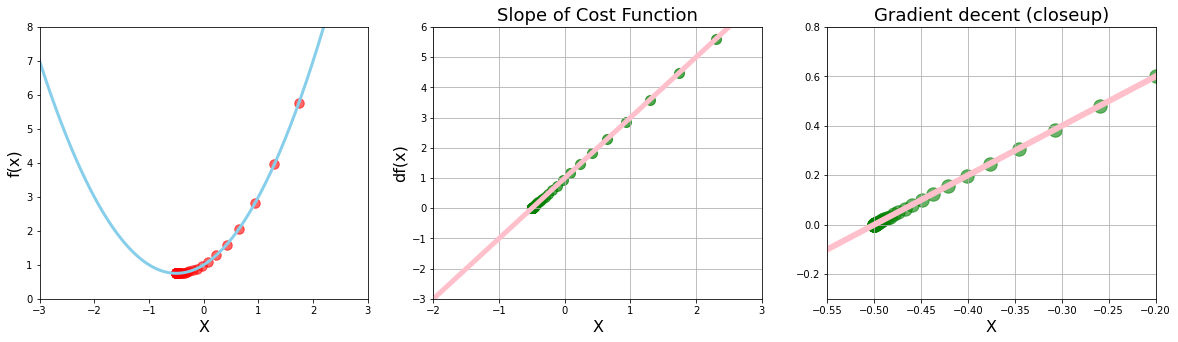

In [11]:
#super impose gradient decent calculations on plot
plt.figure(figsize=[20,5])

## cost function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.xlabel("X" , fontsize = 16)
plt.ylim([0,8])
plt.ylabel("f(x)", fontsize = 16)
plt.plot(x_1, f(x_1), color = "skyblue" , linewidth =3)

values = np.array(x_list)
plt.scatter(x_list,f(values), color = "red" , s = 90 , alpha = 0.6)

# cost function

plt.subplot(1,3,2)
plt.plot(x_1, df(x_1), color = "pink" , linewidth = 5)
plt.scatter(x_list, slope_list, color = "green", s= 100, alpha =0.7)
plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("df(x)", fontsize = 16)

plt.ylim([-3,6])
plt.xlim([-2,3])


##derivative (closeup)
plt.subplot(1,3,3)

plt.plot(x_1, df(x_1), color = "pink" , linewidth = 6)

plt.scatter(x_list, slope_list, color = "green", s= 180, alpha =0.6)

plt.grid()

plt.title("Gradient decent (closeup)", fontsize = 18)
plt.xlabel("X", fontsize = 16)


plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)


plt.show()

# Example 2 mutiple minima vs initial guess
## $$g(x) = x^4 - 4x^2 + 5$$


In [14]:
## data

x_2 = np.linspace(-2,2,1000) 

#g(x) function and dg(x) function

def g(x) :
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x



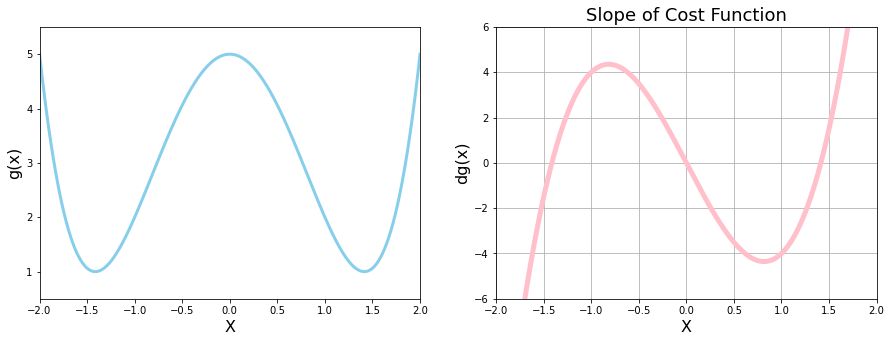

In [15]:
#super impose gradient decent calculations on plot
plt.figure(figsize=[15,5])

## cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.xlabel("X" , fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

plt.plot(x_2, g(x_2), color = "skyblue" , linewidth =3)

#slope of  cost function

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color = "pink" , linewidth = 5)

plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.ylim(-6,6)
plt.xlim(-2,2)

plt.show()


In [16]:
# Gradient decent as a python function

def gradient_decent(derivative_func , initial_guess, multiplier = 0.02 , precision = 0.001, max_iter = 300) :
                                                                                    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter) :
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision :
            break
    return new_x , x_list , slope_list 

In [17]:
local_min, list_x , deriv_list = gradient_decent(dg, 0.5 , 0.02 , 0.001) ## pointer to dg etc
print(f"Local Minimum occurs at :{local_min}")
print("Number of Steps :", len(list_x))

###this is wrong ??? should be 24 steps with min func arount 1.4 ishh

Local Minimum occurs at :1.4122375085019094
Number of Steps : 23


In [18]:
local_min, list_x , deriv_list = gradient_decent(derivative_func= dg, initial_guess=0.5 ,multiplier= 0.02 , precision= 0.001) ## pointer to dg etc
print(f"Local Minimum occurs at :{local_min}")
print("Number of Steps :", len(list_x))

## we can overite function values by using assignment in function call(optional arguments )

Local Minimum occurs at :1.4122375085019094
Number of Steps : 23


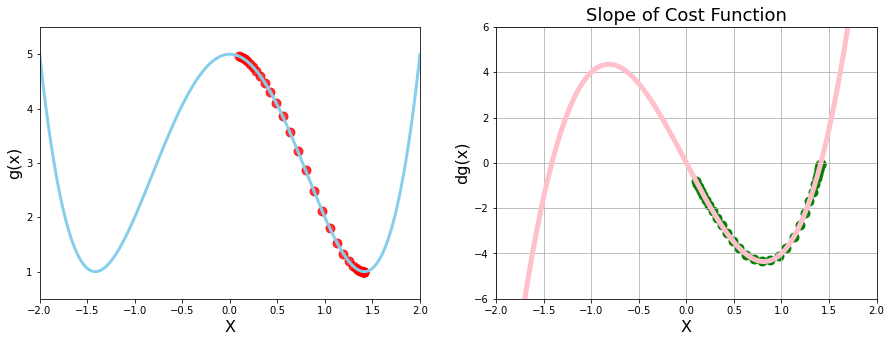

In [19]:
##gradient decent function 
local_min, list_x, deriv_list = gradient_decent(derivative_func=dg, initial_guess= 0.1) 


#plot function and derivative and scatter plot
plt.figure(figsize=[15,5])

## cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.xlabel("X" , fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

plt.plot(x_2, g(x_2), color = "skyblue" , linewidth =3)

plt.scatter(list_x, g(np.array(list_x)) , color = "red" ,s = 80 , alpha = 0.8)

#slope of  cost function

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color = "pink" , linewidth = 5)

plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.ylim(-6,6)
plt.xlim(-2,2)

plt.scatter(list_x, deriv_list, color= "green" , s = 80)
plt.show()

## we can see with initial starting value affects what minima we reach

# Example 3 divergence overflow and python tuples
## $$h(x) = 5x^5- 2x^4 + 2 $$

In [20]:
x_3 = np.linspace(-2.5, 2.5 ,1000)

In [21]:
def h(x) :
    return 5*x**5 - 2*x**4 + 2

def dh(x) :
    return 5*x**4 - 8*x **3

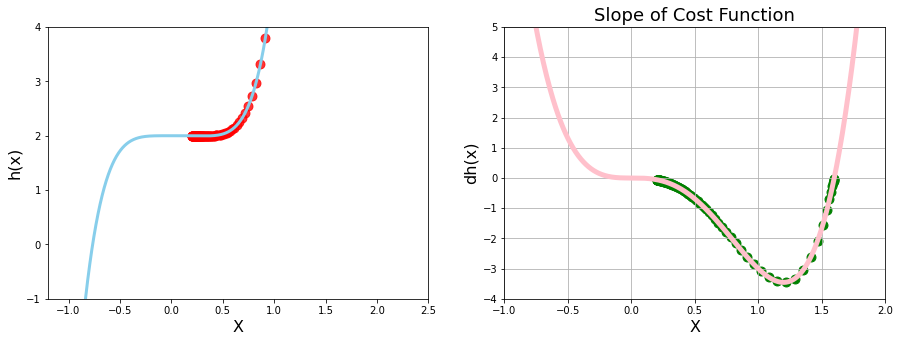

local min occurs at : 1.5989534547394717
Cost at this minimum is : 41.1846177499467
Number of steps : 117


In [22]:
##gradient decent function 
local_min, list_x, deriv_list = gradient_decent(derivative_func=dh, initial_guess= 0.2) ## if guess changes to -0.1 then we get 
                                                                                        ##a overflow error


#plot function and derivative and scatter plot
plt.figure(figsize=[15,5])

## cost function
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])

plt.xlabel("X" , fontsize = 16)
plt.ylabel("h(x)", fontsize = 16)

plt.plot(x_3, h(x_3), color = "skyblue" , linewidth =3)

plt.scatter(list_x, h(np.array(list_x)) , color = "red" ,s = 80 , alpha = 0.8)

#slope of  cost function

plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), color = "pink" , linewidth = 5)

plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dh(x)", fontsize = 16)

plt.ylim(-4,5)
plt.xlim(-1,2)

plt.scatter(list_x, deriv_list, color= "green" , s = 80)
plt.show()

print(f"local min occurs at : {local_min}")
print(f"Cost at this minimum is : {h(local_min)}")
print(f"Number of steps : {len(list_x)}")
## max iter added to function

# Learning Rate


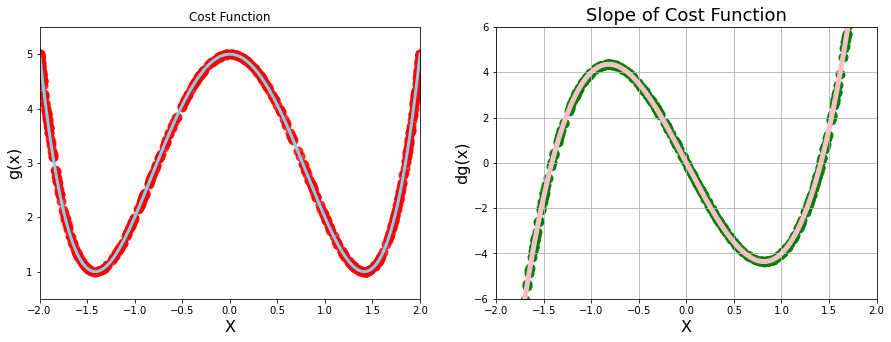

Number of steps : 501


In [28]:
##gradient decent function 
local_min, list_x, deriv_list = gradient_decent(derivative_func=dg, initial_guess= 1.9, multiplier=0.25 , max_iter= 500) 


#plot function and derivative and scatter plot
plt.figure(figsize=[15,5])

## cost function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim([0.5,5.5])

plt.title("Cost Function")
plt.xlabel("X" , fontsize = 16)
plt.ylabel("g(x)", fontsize = 16)

plt.plot(x_2, g(x_2), color = "skyblue" , linewidth =3)

plt.scatter(list_x, g(np.array(list_x)) , color = "red" ,s = 80 , alpha = 0.8)

#slope of  cost function

plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color = "pink" , linewidth = 5)

plt.grid()

plt.title("Slope of Cost Function", fontsize = 18)
plt.xlabel("X", fontsize = 16)
plt.ylabel("dg(x)", fontsize = 16)

plt.ylim(-6,6)
plt.xlim(-2,2)

plt.scatter(list_x, deriv_list, color= "green" , s = 80)
plt.show()


print(f"Number of steps : {len(list_x)}")

## minima still not reached/converged . while loop keeps running , miultiplier = 0.25, max_iter = 500  



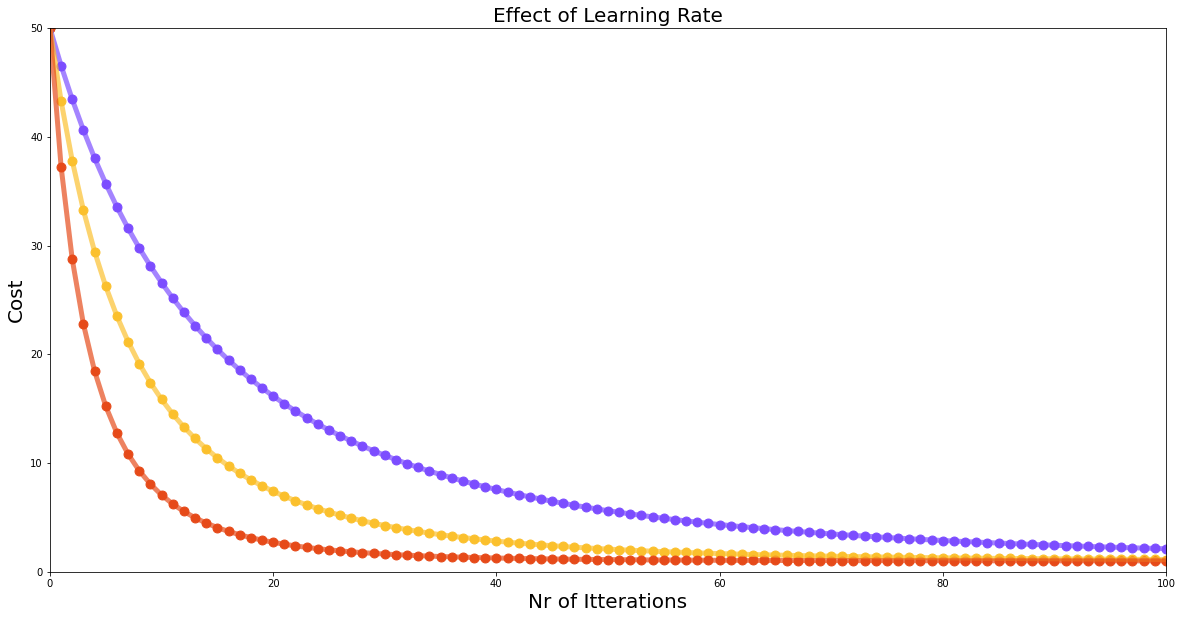

In [29]:
## run gradient decent 3 times
n = 100

low_gamma = gradient_decent(derivative_func=dg, initial_guess= 3, multiplier=0.0005 , 
                                                            max_iter = n ,precision= 0.0001) 


mid_gamma = gradient_decent(derivative_func=dg, initial_guess= 3, multiplier=0.001 , 
                                                            max_iter = n ,precision= 0.0001) 
high_gamma = gradient_decent(derivative_func=dg, initial_guess= 3, multiplier=0.002 , 
                                                            max_iter = n ,precision= 0.0001)  
#plotting reduction in cost for each itteration
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title("Effect of Learning Rate" , fontsize = 20)
plt.xlabel("Nr of Itterations" , fontsize = 20)
plt.ylabel("Cost" , fontsize = 20)

#Values for data
#1) Y axis Data : conver list to numnpy array
low_value = np.array(low_gamma[1])
mid_value = np.array(mid_gamma[1])
high_value = np.array(high_gamma[1])

#2) X Axis Data :Create a list 0, n+1
itteration_list = list(range(0,n+1))


plt.plot(itteration_list, g(low_value), color = "#7C4DFF" , linewidth =5, alpha = 80)
plt.scatter(itteration_list, g(low_value), color = "#7C4DFF", s=80 )

## mid and high gamma plot 
plt.plot(itteration_list, g(mid_value), color = "#FBC02D" , linewidth =5, alpha = 80)
plt.scatter(itteration_list, g(mid_value), color = "#FBC02D", s=80 )

plt.plot(itteration_list, g(high_value), color = "#E64A19" , linewidth =5, alpha = 80)
plt.scatter(itteration_list, g(high_value), color = "#E64A19", s=80 )

plt.show()

# 3d Chart data visualisation
## Minimise $$f(x,y) = \frac{1}{3^{-x^2 -y^2} + 1 }$$
 
Minimise $$f(x,y)= \frac{1}{r + 1}$$  where $r$ is $3^{-x^2 -y^2}$
 
 

In [30]:
def f(x,y) :
    r = 3 **(-x**2 -y**2)
    return 1/ (r +1 )

In [31]:
# make x,y data
x_4 = np.linspace(start = -2 , stop= 2 , num = 200)
y_4 = np.linspace(start = -2 , stop = 2 , num = 200)

print(f"Shape of array {x_4.shape}")  ## Vector for mathamaticisns

## need to convert to 2d array from 1d vector to make a matrix

x_4, y_4 = np.meshgrid(x_4 , y_4)  ##returns matric from vector
print(f"Shape of array after meshgrid {x_4.shape}")

Shape of array (200,)
Shape of array after meshgrid (200, 200)


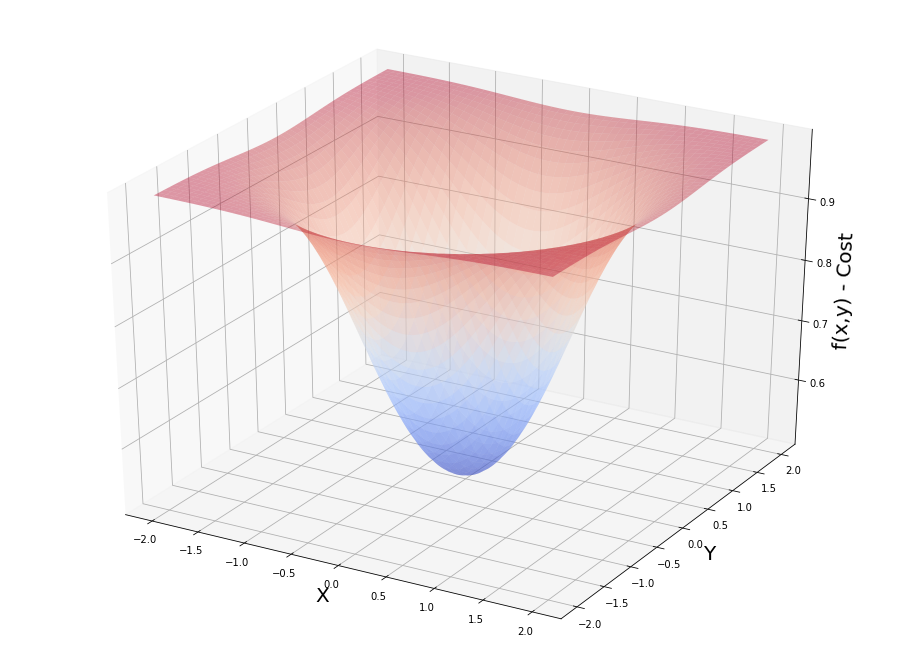

In [32]:
## generate plot

fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection = "3d")  ## .gca Get Current Axis

ax.plot_surface(x_4 , y_4 , f(x_4 , y_4), cmap = cm.coolwarm , alpha = 0.4)



##labels
ax.set_xlabel("X" , fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost " , fontsize =20)



plt.show()

In [33]:
print(y_4)

[[-2.         -2.         -2.         ... -2.         -2.
  -2.        ]
 [-1.9798995  -1.9798995  -1.9798995  ... -1.9798995  -1.9798995
  -1.9798995 ]
 [-1.95979899 -1.95979899 -1.95979899 ... -1.95979899 -1.95979899
  -1.95979899]
 ...
 [ 1.95979899  1.95979899  1.95979899 ...  1.95979899  1.95979899
   1.95979899]
 [ 1.9798995   1.9798995   1.9798995  ...  1.9798995   1.9798995
   1.9798995 ]
 [ 2.          2.          2.         ...  2.          2.
   2.        ]]


# Partial Derivatives and Symbolic Computation
## $$\frac{\partial f}{\partial x}= \frac {2x \ln(3)  \cdot3 ^ {-x^2 - y^2}} {\left(3^{-x^2 -y^2}+1\right)^2} $$
## $$\frac{\partial f}{\partial y}= \frac {2y \ln(3)  \cdot3 ^ {-x^2 - y^2}} {\left(3^{-x^2 -y^2}+1\right)^2} $$

#### SymPy : Symbolic mathmatics

In [34]:
a , b = symbols("x , y")
print("Our cost function f(x,y) is : " ,f(a,b))
print("Partial Derivative wrt x is :" , diff(f(a,b), a)) # can change x valye to y to confirm if partial deriv
print("Value of f(x,y) at x = 1.8 and y =1.0 : "  ,f(a,b).evalf(subs = {a:1.8 , b:1.0})) #dictonary/assosiative array - key and value pair {:}
print("Value of Partial derviate wrt x is" , diff(f(a,b), a).evalf(subs = {a:1.8 , b:1.0}))



Our cost function f(x,y) is :  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is : 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x = 1.8 and y =1.0 :  0.990604794032582
Value of Partial derviate wrt x is 0.0368089716197505


In [35]:
## Partial deriv fun ex 4
def fpx(x,y) :
    r= 3**(-x**2 - y**2)  ## use r because it is constant
    return 2*x*log(3)*r/ (r + 1)**2

def fpy(x,y) :
    r= 3**(-x**2 - y**2)
    return 2*y*log(3) * r / (r + 1) **2

In [36]:
fpx(1.8,1.0)

0.036808971619750504

In [37]:
# setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8 , 1.0]) # initial guess

for n in range(max_iter) :
    gradient_x = diff(f(a, b), a).evalf(subs = {a:params[0] , b: params[1]}) #slope using value of partial deriv 
    gradient_y = diff(f(a, b), b).evalf(subs = {a:params[0] , b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients) 

print(f"Values in gradient: {gradients}")
print(f"Minimum of X occurs at: {params[0]} ")
print(f"Minimum of Y occurs at: {params[1]} ")
print(f"The Cost is : {f(params[0], params[1])}")

Values in gradient: [0.000461440542096373 0.000256355856720208]
Minimum of X occurs at: 0.000793898510134722 
Minimum of Y occurs at: 0.000441054727852623 
The Cost is : 0.500000226534985


In [38]:
## More optamised and will run quicker/ less resource intensive

multiplier = 0.1
max_iter = 500
params = np.array([1.8 , 1.0]) # initial guess

for n in range(max_iter) :
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients) 

print(f"Values in gradient: {gradients}")
print(f"Minimum of X occurs at: {params[0]} ")
print(f"Minimum of Y occurs at: {params[1]} ")
print(f"The Cost is : {f(params[0], params[1])}")

Values in gradient: [2.01013038e-11 1.11673910e-11]
Minimum of X occurs at: 3.458385998858304e-11 
Minimum of Y occurs at: 1.9213255549212797e-11 
The Cost is : 0.5


## Graphing 3D Gradient Decent and Adv Numpy Array

In [39]:
## More optamised and will run quicker/ less resource intensive

multiplier = 0.1
max_iter = 500
params = np.array([1.8 , 1.0]) # initial guess
values_array = params.reshape(1,2) # (row,colums)
print(values_array.shape)  


for n in range(max_iter) :
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - (multiplier * gradients) 
    # values_array = np.append(arr = values_array , values = params.reshape(1,2) , axis = 0)
    values_array = np.concatenate((values_array , params.reshape(1,2)), axis=0)
    
    
print(f"Values in gradient: {gradients}")
print(f"Minimum of X occurs at: {params[0]} ")
print(f"Minimum of Y occurs at: {params[1]} ")
print(f"The Cost is : {f(params[0], params[1])}")

(1, 2)
Values in gradient: [2.01013038e-11 1.11673910e-11]
Minimum of X occurs at: 3.458385998858304e-11 
Minimum of Y occurs at: 1.9213255549212797e-11 
The Cost is : 0.5


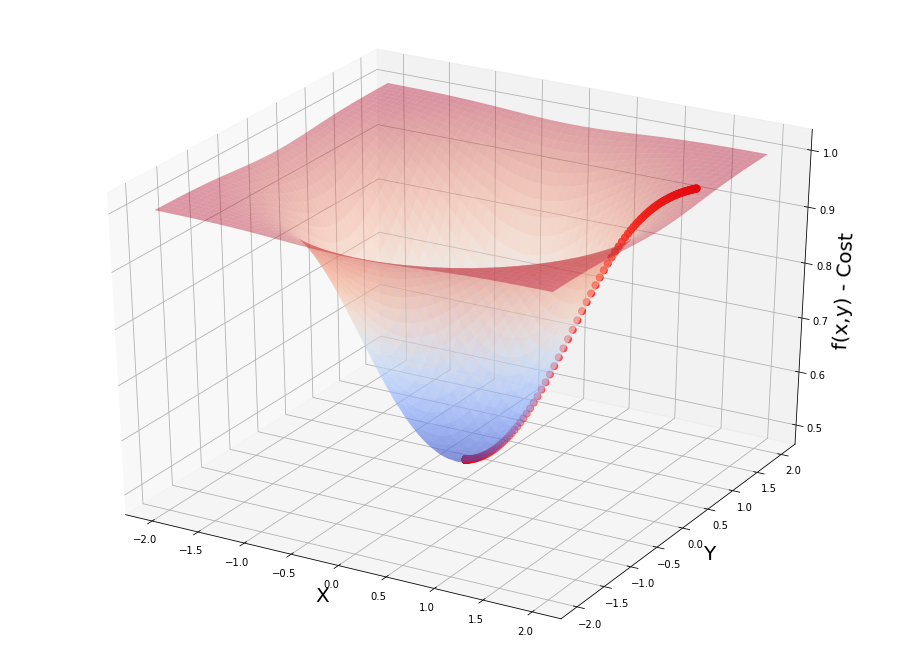

In [40]:
## generate plot

fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection = "3d")  ## .gca Get Current Axis

ax.plot_surface(x_4 , y_4 , f(x_4 , y_4), cmap = cm.coolwarm , alpha = 0.4)

ax.scatter(values_array[:,0] , values_array[:,1] , f(values_array[:,0],values_array[:,1]) , color = "RED" , s= 50)


##labels
ax.set_xlabel("X" , fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x,y) - Cost " , fontsize =20)



plt.show()

In [41]:
#Advanced NumPy array practice
kirk = np.array([["Captain","Guitar"]])
print(kirk.shape)

hs_band = np.array([["Black Thought" , "MC"],["QuestLove","Drums"]])
print(hs_band.shape) # 2 rows, 2 colums

# display(hs_band) to check

print("hs_band[0]", hs_band[0]) # first row
print("hs_band[0][1]", hs_band[0][1]) # first row, second column

#challenge find index of nested questlove in array
print("Questlove is found:" , hs_band[1][0])

the_roots = np.append(arr = hs_band , values = kirk , axis = 0)
print(the_roots)

print("Printing Nicknames..." , the_roots[:,0])

the_roots = np.append(arr = the_roots, values = [["Malik B", "MC"]],axis = 0)
print("Printing Band roles..." , the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[0][1] MC
Questlove is found: QuestLove
[['Black Thought' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Printing Nicknames... ['Black Thought' 'QuestLove' 'Captain']
Printing Band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 Working with Data and a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1} ^ {n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1} ^ {n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1} ^ {n} \big(y^{(i)} - \hat{y}) $$

In [42]:
# make sample data
x_5 = np.array([[0.1 ,1.2 , 2.4 , 3.2 , 4.1 , 5.7 , 6.5]]).transpose() 
y_5 = np.array([1.7 ,2.4 ,3.5 , 3.0 , 6.1 , 9.4, 8.2]).reshape(7,1) # row/col

print("Shape of X :", x_5.shape )
print("Shape of Y :", y_5.shape )

Shape of X : (7, 1)
Shape of Y : (7, 1)


In [43]:
# quick Linier Reg
regr = LinearRegression()
regr.fit(x_5,y_5)
print("Theta 0:" , regr.intercept_[0])
print("Theta 1:" , regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


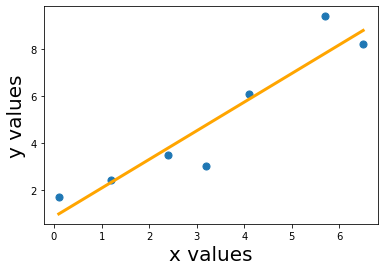

In [44]:
plt.scatter(x_5, y_5 , s=50)
plt.plot(x_5, regr.predict(x_5) , color = "orange" , linewidth = 3)
plt.xlabel("x values", fontsize = 20)
plt.ylabel("y values", fontsize = 20)
plt.show()

In [64]:
#y hat = theta 0 + theta_1*x
y_hat =  0.8475351486029536 + 1.2227264637835915 * x_5
print("Estimated y_hat are: \n" , y_hat)
print("Actual y values are: \n" , y_5)

Estimated y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [67]:
def mse(y,y_hat) :
    # return (1/y.size) * sum((y-y_hat)**2) # origionaly hard coded n = 7
    mse_calc = np.average((y-y_hat)**2 , axis = 0)
    return mse_calc


In [68]:
mse(y_5 , y_hat)

array([0.94796558])

In [69]:
print("Manualy calculated MSE is :" , mse(y_5 , y_hat))
print("SkLearn regressiom using manual MSE is :" , mean_squared_error(y_5 , y_hat)) 
print("MSE calculated is :",  mean_squared_error(y_5, regr.predict(x_5))) # y and x value to predi

Manualy calculated MSE is : [0.94796558]
SkLearn regressiom using manual MSE is : 0.9479655759794577
MSE calculated is : 0.9479655759794577


# 3d plot for MES Cost Function
## Make data for theta

In [70]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3 , num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3 , num = nr_thetas)
plot_t0 , plot_t1 = np.meshgrid(th_0,th_1) # 3D array created for 





# Calc MSE using nested for loops

In [71]:
plot_cost =  np.zeros((nr_thetas , nr_thetas))

for i in range(nr_thetas) :
    for j in range(nr_thetas) :
         # print(plot_t0[i][j])
            y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
            plot_cost[i][j] = mse(y_5, y_hat)
            
print(f"Shape of plot_t0 {plot_t0.shape}")
print(f"Shape of plot_t1 {plot_t1.shape}")
print(f"Shape of plot_cost {plot_cost.shape}")

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [51]:
# nested loop practice
for i in range(3) :
    for j in range(3) :
        print(f"Value of i is {i} , value of j is {j}")
        

Value of i is 0 , value of j is 0
Value of i is 0 , value of j is 1
Value of i is 0 , value of j is 2
Value of i is 1 , value of j is 0
Value of i is 1 , value of j is 1
Value of i is 1 , value of j is 2
Value of i is 2 , value of j is 0
Value of i is 2 , value of j is 1
Value of i is 2 , value of j is 2


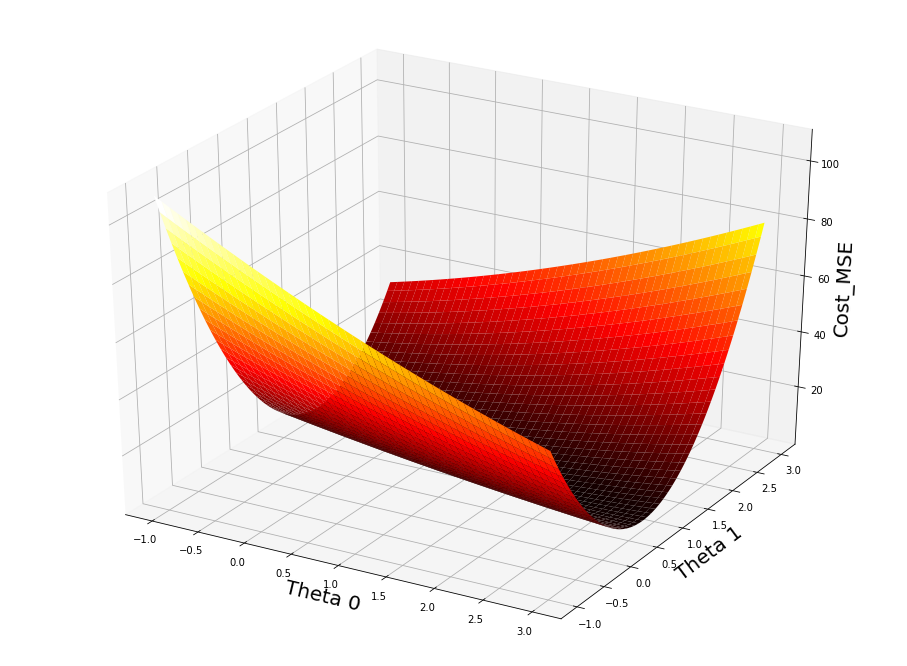

In [72]:
# ploting mse
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.set_xlabel("Theta 0",  fontsize= 20)
ax.set_ylabel("Theta 1" , fontsize= 20)
ax.set_zlabel("Cost_MSE", fontsize= 20)

ax.plot_surface(plot_t0 ,plot_t1  , plot_cost, cmap = cm.hot)
plt.show()

In [80]:
print('Min value of cost', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print("min occurs(i,j) at ", ij_min)
print("Min MSE for theta 0 at plot_t0 is [111,91]", plot_t0[111,91])
print("Min MSE for theta 0 at plot_t1 is [111,91]", plot_t1[111,91]) ## this is tutorials value as i seem to be off

Min value of cost 0.9483826526747164
min occurs(i,j) at  (111, 91)
Min MSE for theta 0 at plot_t0 is [111,91] 0.829145728643216
Min MSE for theta 0 at plot_t1 is [111,91] 1.2311557788944723


# Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$


## $$\frac{\partial MSE}{\partial \theta_0}= - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)  $$
## $$\frac{\partial MSE}{\partial \theta_1}= - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)}\big) \big(x ^{(i)}\big)  $$

## MSE and Gradient Decent


In [94]:
# x value, y value, thetas as array (thetas0 and ind[0] and thetas1 ind[1] 
def grad(x,y,thetas) :
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x) 
    
    #return np.array([theta0_slope[0], theta1_slope[1]])
    #return np.append(arr = theta0_slope, values = theta1_slope)
    return np.concatenate((theta0_slope,theta1_slope), axis = 0)
    
    
  

In [97]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

## Collect datapoint for scatter

plot_val = thetas.reshape(1, 2)
mse_val = mse(y_5 , thetas[0] + thetas[1] * x_5)

for i in range(1000) :
    thetas = thetas - multiplier * grad(x_5, y_5 , thetas)
    
    # append value to array
    plot_val = np.concatenate((plot_val, thetas.reshape(1,2)) , axis = 0)
    mse_val = np.append(arr = mse_val , values = mse(y_5, thetas[0] + thetas[1] * x_5))
    
print(f"Min Occurs at : {thetas[0]}")
print(f"Min at Theta1 Occurs at : {thetas[1]}") 
print("MSE of Slope " , mse(y_5, thetas[0] + thetas[1]*x_5))


Min Occurs at : 0.8532230461743415
Min at Theta1 Occurs at : 1.2214935332607393
MSE of Slope  [0.94797511]


In [76]:
display(mse_val)

array([71.786     , 33.55719479, 16.17569629, ...,  0.94797533,
        0.94797522,  0.94797511])

In [77]:
plot_val.shape

(1, 2)

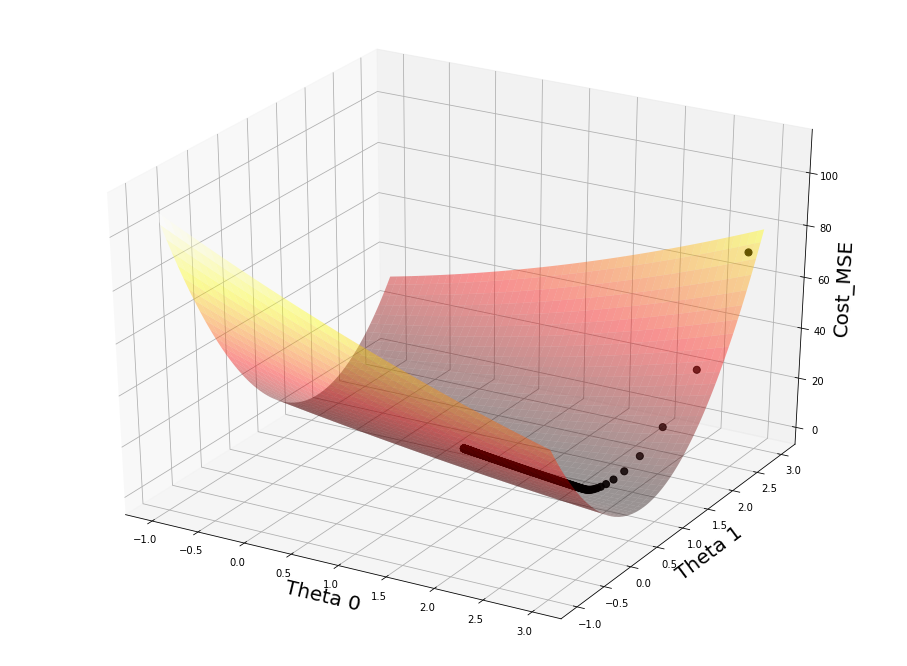

In [100]:
# ploting mse
fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.set_xlabel("Theta 0",  fontsize= 20)
ax.set_ylabel("Theta 1" , fontsize= 20)
ax.set_zlabel("Cost_MSE", fontsize= 20)

ax.scatter(plot_val[:, 0], plot_val[:, 1] , mse_val , s= 50 , color = "black")

ax.plot_surface(plot_t0 ,plot_t1  , plot_cost, cmap = cm.rainbow , alpha = 0.4)

plt.show()